In [15]:
# Import libraries
import pandas as pd

# Load datasets
customers = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Project\data\Customers.csv")
products = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Project\data\Products.csv")
transactions = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Project\data\Transactions.csv")

# Display the first few rows of each dataset
print("Customers Dataset:")
display(customers.head())

print("Products Dataset:")
display(products.head())

print("Transactions Dataset:")
display(transactions.head())


Customers Dataset:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


Products Dataset:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


Transactions Dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [16]:
print("Customers Info:")
print(customers.info())

print("\nProducts Info:")
print(products.info())

print("\nTransactions Info:")
print(transactions.info())

print("Missing Values in Customers:")
print(customers.isnull().sum())

print("\nMissing Values in Products:")
print(products.isnull().sum())

print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())

print("Customers Summary:")
print(customers.describe(include='all'))

print("\nProducts Summary:")
print(products.describe(include='all'))

print("\nTransactions Summary:")
print(transactions.describe())

Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null

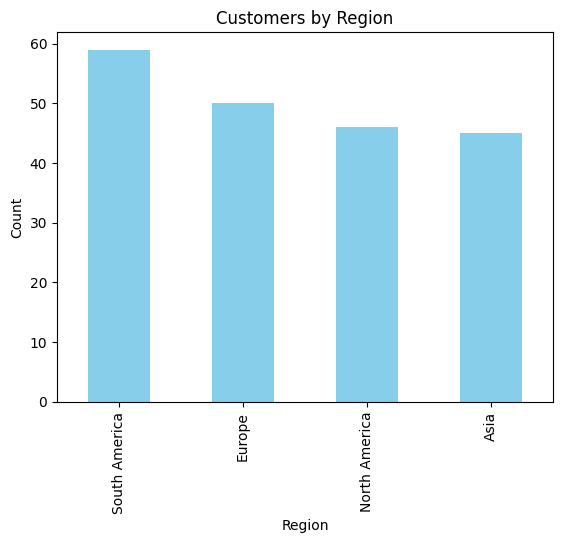

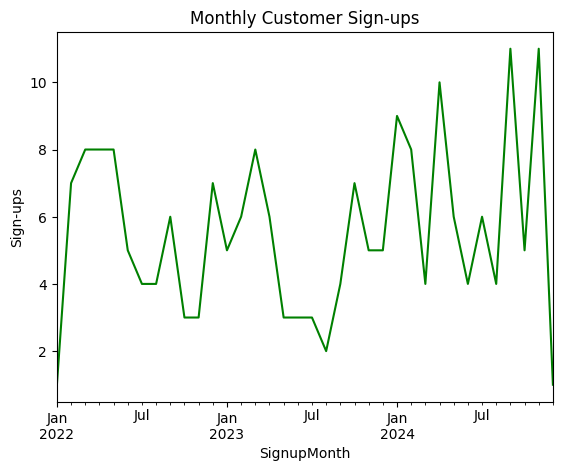

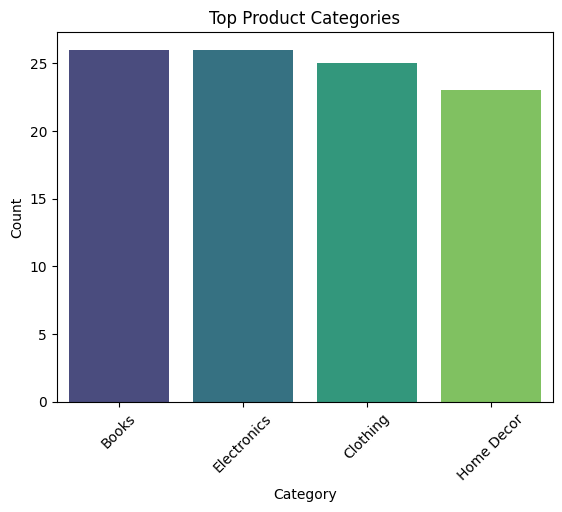

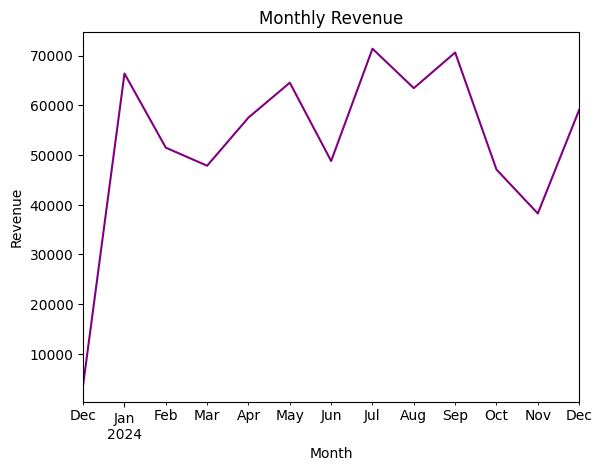

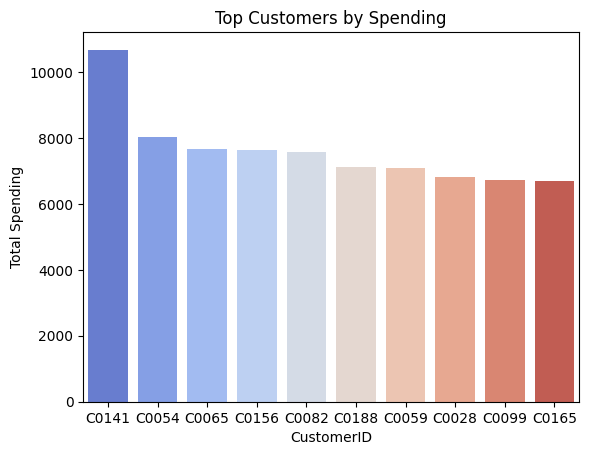

In [17]:
#Distribution of customers by region
import matplotlib.pyplot as plt
import seaborn as sns

region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', title="Customers by Region", color='skyblue')
plt.ylabel("Count")
plt.show()

#Monthly customer sign-ups
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')

signup_trend = customers['SignupMonth'].value_counts().sort_index()
signup_trend.plot(kind='line', title="Monthly Customer Sign-ups", color='green')
plt.ylabel("Sign-ups")
plt.show()

#Top-selling product categories
top_categories = products['Category'].value_counts()
sns.barplot(x=top_categories.index, y=top_categories.values, hue=top_categories.index, palette="viridis")
plt.title("Top Product Categories")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

#Monthly revenue trends
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')

monthly_revenue = transactions.groupby('Month')['TotalValue'].sum()
monthly_revenue.plot(kind='line', title="Monthly Revenue", color='purple')
plt.ylabel("Revenue")
plt.show()


#Top customers by spending
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_customers.index, y=top_customers.values, hue=top_customers.index, palette="coolwarm")
plt.title("Top Customers by Spending")
plt.ylabel("Total Spending")
plt.show()

